In [1]:
import sys
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

import torch
from torchvision.io import read_image
from torchvision import models, transforms, datasets

In [2]:
# img = cv2.imread("./fig/fig/rose.jpg", cv2.IMREAD_COLOR)

# if img is None: 
#     print("img is none")
#     sys.exit()

# cv2.namedWindow("image", cv2.WINDOW_AUTOSIZE)
# cv2.imshow("image", img)

# while True:
#     key = cv2.waitKey()
#     if key == 27:
#         break
# cv2.destroyAllWindows()

In [3]:
# cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#     print("Video open failed")
#     sys.exit()

# while True:
#     ret, frame = cap.read()

#     if not ret: #ret: 이미지
#         break
    
#     edge = cv2.Canny(frame, 100, 150)
#     blr = cv2.GaussianBlur(frame, (0, 0), 2)
#     cv2.imshow("edge", edge)
#     cv2.imshow("frame", frame)
#     cv2.imshow("blur", blr)

#     #waitKey가 기다리고 있어서 사진으로만 나옴. 영상처리 하기 위해선 ()에 20같은 숫자 넣기
#     #20sec로 프레임 넘어감. 100프레임이면 좀 어색하게 됨
#     if cv2.waitKey() == 27: # esc입력하면 break
#         break

# cap.release() # video 잡을 때는 이것도 같이 꺼줘야됨
# cv2.destroyAllWindows()

In [4]:
#dir(models.detection)

weights = models.detection.SSD300_VGG16_Weights.COCO_V1 # 모델 불러오기 COCO dataset
model = models.detection.ssd300_vgg16(weights = weights)

model.eval()


SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [5]:
transformed = transforms.Compose([
    transforms.Resize((300, 300)), # VGG16 input size 300 * 300
    transforms.ToTensor() #RGB가 아니라 Tensor로 바꿈
])

dataset = datasets.VOCDetection(root = './VOC_dataset/VOC2012', year='2012', image_set="val", download=True, transform=transformed)

Using downloaded and verified file: ./VOC_dataset/VOC2012\VOCtrainval_11-May-2012.tar
Extracting ./VOC_dataset/VOC2012\VOCtrainval_11-May-2012.tar to ./VOC_dataset/VOC2012


In [6]:
len(dataset) #5823
len(dataset[0]) #2인 이유 -> image랑 annotation있음 우리가 필요한건 image

2

In [35]:
import random
idx = random.randint(0, len(dataset))
image, _ =dataset[idx] #image만 받음
print(image.shape)
image = image.unsqueeze(0) #[1, 3, 300, 300] [batch, channel, ..]에서 batch 없앰

with torch.no_grad():
    prediction = model(image)


prediction = prediction[0] # prediction 복제


torch.Size([3, 300, 300])


In [8]:
#prediction[0]["labels"]

In [9]:
#prediction[0]["scores"] # bounding box마다 확률
# 18%도 신뢰도가 떨어짐

#50% 이상인것만 뽑아서 bounding box 그려주자

In [10]:
#prediction[0]["boxes"]
#score가 높은것만 bounding box 하면됨 

In [11]:
# image = image.cpu().data[0] # 다 gpu에서 돌려야하는데 여기엔 gpu가 없음
# image.shape

torch.Size([3, 300, 300])

In [12]:
# image = transforms.functional.to_pil_image(image) # 
# image = np.array(image) #input type을 같게 맞춰줌


In [13]:
# image.shape

(300, 300, 3)

torch.Size([3, 300, 300])


<function matplotlib.pyplot.show(close=None, block=None)>

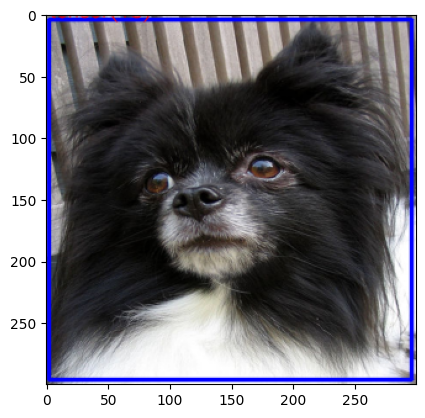

In [58]:
import random
idx = random.randint(0, len(dataset))
image, _ =dataset[idx] #image만 받음
print(image.shape)
image = image.unsqueeze(0) #[1, 3, 300, 300] [batch, channel, ..]에서 batch 없앰

with torch.no_grad():
    prediction = model(image)


prediction = prediction[0] # prediction 복제

image = image.cpu().data[0]
image = transforms.functional.to_pil_image(image)
image =np.array(image)

threshold=0.5 
for box,label,score in zip(prediction["boxes"],prediction["labels"],prediction["scores"]):
    if score >= threshold:
        box = list(map(int,box))
        cv2.rectangle(image,(box[0],box[1]),(box[2],box[3]),
                      (0,0,255),2,cv2.LINE_AA)
        cv2.putText(image,str(label),(box[0],box[1]-2),cv2.FONT_HERSHEY_SIMPLEX,
                    .5,(255,0,0),1,cv2.LINE_AA)

plt.imshow(image)
plt.show

In [15]:
len(prediction["boxes"]) #200

200

In [16]:
import pandas as pd 

img = cv2.imread("./fig/fig/face/king_face.png")

if img is None:
    print("nonononon")
    sys.exit()

cv2.imshow("image", img)
#model import
model = "./opencv_face_detector_uint8.pb" # 파라미터가 들어가있는 모델
config = "./opencv_face_detector.pbtxt"

#imageNet 읽음
face_net = cv2.dnn.readNet(model, config)
if face_net.empty(): # 예외처리
    print("net open failed")
    sys.exit()

#image resize
blob = cv2.dnn.blobFromImage(img, 1, (300, 300), (104, 177, 123), swapRB = False)
face_net.setInput(blob)
out = face_net.forward() #face의 좌표들이 나옴옴

labels = ["img", "is_face", "confidence", "x1", "y1", "x2", "y2"]
out_df = pd.DataFrame(out[0, 0], columns = labels)
print("out df = \n", out_df)

detect = out[0, 0] # 앞에 두개 필요없음
h, w = img.shape[:2]

threshold = 0.5
for i in range(len(detect)): # 200개 row 방향으로 count
    confidence = detect[i, 2]

    if confidence >= threshold:
        x1 = int(detect[i, 3]*w) # 계산은 float로 그림은int
        y1 = int(detect[i, 4]*h)
        x2 = int(detect[i, 5]*w)
        y2 = int(detect[i, 6]*h) # 실제로 우리가 원하는 좌푯값이 나옴

        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 128), 5)
        text = f"Face: {confidence*100:.3F}"
        cv2.putText(img, text, (x1, y1 -2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)


cv2.imshow("image", img)
cv2.waitKey()
cv2.destroyAllWindows()

out df = 
      img  is_face  confidence        x1        y1        x2        y2
0    0.0      1.0    0.989431  0.825202  0.502988  0.893821  0.658601
1    0.0      1.0    0.950553  0.147596  0.511079  0.215222  0.681570
2    0.0      1.0    0.947276  0.288199  0.444965  0.359195  0.628823
3    0.0      1.0    0.920967  0.499137  0.392986  0.589955  0.570557
4    0.0      1.0    0.835135  0.642767  0.463616  0.720524  0.659535
..   ...      ...         ...       ...       ...       ...       ...
195  0.0      0.0    0.000000  0.000000  0.000000  0.000000  0.000000
196  0.0      0.0    0.000000  0.000000  0.000000  0.000000  0.000000
197  0.0      0.0    0.000000  0.000000  0.000000  0.000000  0.000000
198  0.0      0.0    0.000000  0.000000  0.000000  0.000000  0.000000
199  0.0      0.0    0.000000  0.000000  0.000000  0.000000  0.000000

[200 rows x 7 columns]


In [5]:
out.shape

(1, 1, 200, 7)

In [10]:
import pandas as pd 

img = cv2.imread("./fig/fig/face/dong_face.jpg")

if img is None:
    print("nonononon")
    sys.exit()

cv2.imshow("image", img)
#model import
model = "./opencv_face_detector_uint8.pb" # 파라미터가 들어가있는 모델
config = "./opencv_face_detector.pbtxt"

#imageNet 읽음
face_net = cv2.dnn.readNet(model, config)
if face_net.empty(): # 예외처리
    print("net open failed")
    sys.exit()

#image resize
blob = cv2.dnn.blobFromImage(img, 1, (300, 300), (104, 177, 123), swapRB = False)
face_net.setInput(blob)
out = face_net.forward() #face의 좌표들이 나옴옴

labels = ["img", "is_face", "confidence", "x1", "y1", "x2", "y2"]
out_df = pd.DataFrame(out[0, 0], columns = labels)
print("out df = \n", out_df)

detect = out[0, 0] # 앞에 두개 필요없음
h, w = img.shape[:2]

threshold = 0.5
for i in range(len(detect)): # 200개 row 방향으로 count
    confidence = detect[i, 2]

    if confidence >= threshold:
        x1 = int(detect[i, 3]*w) # 계산은 float로 그림은int
        y1 = int(detect[i, 4]*h)
        x2 = int(detect[i, 5]*w)
        y2 = int(detect[i, 6]*h) # 실제로 우리가 원하는 좌푯값이 나옴

        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 128), 5)
        text = f"Face: {confidence*100:.3F}"
        cv2.putText(img, text, (x1, y1 -2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)


cv2.imshow("image", img)
cv2.waitKey()
cv2.destroyAllWindows()

out df = 
      img  is_face  confidence        x1        y1        x2        y2
0    0.0      1.0    0.999989  0.344201  0.159701  0.631570  0.689682
1    0.0      1.0    0.123630  4.172398  4.010036  4.842006  4.987341
2    0.0      1.0    0.117388  0.157865  4.011430  0.824834  4.991556
3    0.0      1.0    0.108739  4.168867  0.024337  4.839179  0.977494
4    0.0      1.0    0.101998  0.162962  0.020893  0.829266  0.978240
..   ...      ...         ...       ...       ...       ...       ...
195  0.0      0.0    0.000000  0.000000  0.000000  0.000000  0.000000
196  0.0      0.0    0.000000  0.000000  0.000000  0.000000  0.000000
197  0.0      0.0    0.000000  0.000000  0.000000  0.000000  0.000000
198  0.0      0.0    0.000000  0.000000  0.000000  0.000000  0.000000
199  0.0      0.0    0.000000  0.000000  0.000000  0.000000  0.000000

[200 rows x 7 columns]


In [13]:
# 잘 못찾으면 음!
# 교수님도 이유를 모름
# what~

import pandas as pd 

img = cv2.imread("./fig/fig/face/peoples.jpg")

if img is None:
    print("nonononon")
    sys.exit()

cv2.imshow("image", img)
#model import
model = "./opencv_face_detector_uint8.pb" # 파라미터가 들어가있는 모델
config = "./opencv_face_detector.pbtxt"

#imageNet 읽음
face_net = cv2.dnn.readNet(model, config)
if face_net.empty(): # 예외처리
    print("net open failed")
    sys.exit()

#image resize
blob = cv2.dnn.blobFromImage(img, 1, (300, 300), (104, 177, 123), swapRB = False)
face_net.setInput(blob)
out = face_net.forward() #face의 좌표들이 나옴옴

labels = ["img", "is_face", "confidence", "x1", "y1", "x2", "y2"]
out_df = pd.DataFrame(out[0, 0], columns = labels)
print("out df = \n", out_df)

detect = out[0, 0] # 앞에 두개 필요없음
h, w = img.shape[:2]

threshold = 0.2
for i in range(len(detect)): # 200개 row 방향으로 count
    confidence = detect[i, 2]

    if confidence >= threshold:
        x1 = int(detect[i, 3]*w) # 계산은 float로 그림은int
        y1 = int(detect[i, 4]*h)
        x2 = int(detect[i, 5]*w)
        y2 = int(detect[i, 6]*h) # 실제로 우리가 원하는 좌푯값이 나옴

        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 128), 5)
        text = f"Face: {confidence*100:.3F}"
        cv2.putText(img, text, (x1, y1 -2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)


cv2.imshow("image", img)
cv2.waitKey()
cv2.destroyAllWindows()

out df = 
      img  is_face  confidence        x1        y1        x2        y2
0    0.0      1.0    0.590568  0.626074  0.187029  0.680641  0.296505
1    0.0      1.0    0.372141  0.357254  0.203542  0.403953  0.288450
2    0.0      1.0    0.200632  0.744656  0.243664  0.792443  0.322226
3    0.0      1.0    0.192414  0.774478  0.511325  0.814502  0.639421
4    0.0      1.0    0.153373  0.238370  0.257610  0.292384  0.341658
..   ...      ...         ...       ...       ...       ...       ...
195  0.0      1.0    0.106736  0.648549  0.829512  0.671149  0.878831
196  0.0      1.0    0.106711  0.592007  0.694454  0.621399  0.760319
197  0.0      1.0    0.106636  0.502016  0.688212  0.526642  0.736050
198  0.0      1.0    0.106601  0.613044  0.577035  0.639471  0.627254
199  0.0      1.0    0.106594  0.492836  0.693589  0.518225  0.755488

[200 rows x 7 columns]


In [15]:
# 머신러닝은 눈 가리면 얼굴 못 찾음


import pandas as pd 

img = cv2.imread("./people_yolo.jpg")

if img is None:
    print("nonononon")
    sys.exit()

cv2.imshow("image", img)
#model import
model = "./opencv_face_detector_uint8.pb" # 파라미터가 들어가있는 모델
config = "./opencv_face_detector.pbtxt"

#imageNet 읽음
face_net = cv2.dnn.readNet(model, config)
if face_net.empty(): # 예외처리
    print("net open failed")
    sys.exit()

#image resize
blob = cv2.dnn.blobFromImage(img, 1, (300, 300), (104, 177, 123), swapRB = False)
face_net.setInput(blob)
out = face_net.forward() #face의 좌표들이 나옴옴

labels = ["img", "is_face", "confidence", "x1", "y1", "x2", "y2"]
out_df = pd.DataFrame(out[0, 0], columns = labels)
print("out df = \n", out_df)

detect = out[0, 0] # 앞에 두개 필요없음
h, w = img.shape[:2]

threshold = 0.5
for i in range(len(detect)): # 200개 row 방향으로 count
    confidence = detect[i, 2]

    if confidence >= threshold:
        x1 = int(detect[i, 3]*w) # 계산은 float로 그림은int
        y1 = int(detect[i, 4]*h)
        x2 = int(detect[i, 5]*w)
        y2 = int(detect[i, 6]*h) # 실제로 우리가 원하는 좌푯값이 나옴

        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 128), 5)
        text = f"Face: {confidence*100:.3F}"
        cv2.putText(img, text, (x1, y1 -2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)


cv2.imshow("image", img)
cv2.waitKey()
cv2.destroyAllWindows()

out df = 
      img  is_face  confidence        x1        y1        x2        y2
0    0.0      1.0    0.973022  0.499878  0.110539  0.658697  0.267934
1    0.0      1.0    0.126813  4.164088  4.004655  4.840898  4.983123
2    0.0      1.0    0.120573  4.017093  0.128682  4.977018  0.876858
3    0.0      1.0    0.118004  0.020151  0.123639  0.984540  0.875821
4    0.0      1.0    0.117466  0.160479  4.003917  0.852066  4.979984
..   ...      ...         ...       ...       ...       ...       ...
195  0.0      0.0    0.000000  0.000000  0.000000  0.000000  0.000000
196  0.0      0.0    0.000000  0.000000  0.000000  0.000000  0.000000
197  0.0      0.0    0.000000  0.000000  0.000000  0.000000  0.000000
198  0.0      0.0    0.000000  0.000000  0.000000  0.000000  0.000000
199  0.0      0.0    0.000000  0.000000  0.000000  0.000000  0.000000

[200 rows x 7 columns]
